This notebook can be used to extract a 1km grid from an existing 10m-resolution raster. This is intended to support the extraction of climatic data using the ClimateNA application.

In [1]:
import numpy as np
import glob
import rasterio
from rasterio.enums import Resampling
from affine import Affine
import pandas as  pd
import pyproj #import Proj, transform
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
ACQ_NAME = 'keno_2012'
MY_YEAR = 2012

In [47]:
ELEV = '../data/interim/lidar/processed_lidar_acquisitions/lidar_derived_rasters/{}/elevation.tif'.format(ACQ_NAME)

In [48]:
with rasterio.open(ELEV) as src:
    elev = src.read(1, masked=True)
    km_elev = src.read(1, masked=True, 
                       out_shape=tuple(np.array(src.shape) // 10),
                       resampling=Resampling.average
                      )
    km_meta = src.meta.copy()
    km_meta.update(width=km_elev.shape[0],
                   height=km_elev.shape[1],
                   transform=src.transform * Affine.scale(100))

In [49]:
elev.shape, km_elev.shape

((3101, 3801), (310, 380))

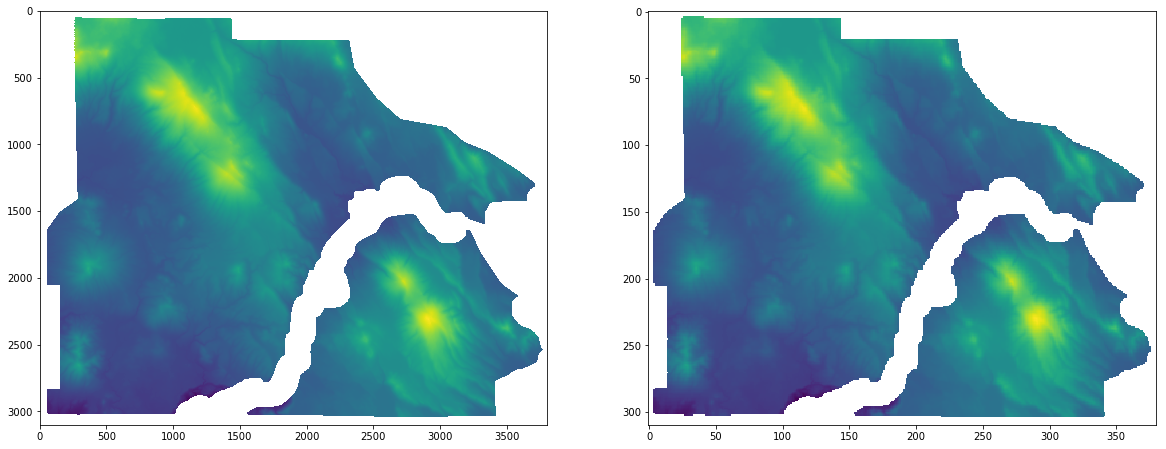

In [50]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
axs[0].imshow(elev)
axs[1].imshow(km_elev)
plt.show()

In [41]:
xx, yy = np.meshgrid(np.arange(km_elev.shape[0]), np.arange(km_elev.shape[1]))#, indexing='ij')
utm_x, utm_y = rasterio.transform.xy(km_meta['transform'], xx.flatten(), yy.flatten())
lon, lat = np.array(
    pyproj.transform(pyproj.Proj(init='epsg:6339'),
                     pyproj.Proj(init='epsg:4326'), 
                     utm_x, 
                     utm_y))

In [25]:
xx.shape

(1090, 1560)

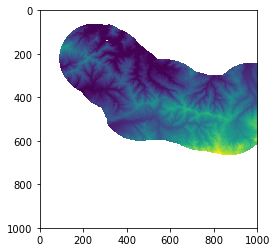

In [20]:
plt.imshow(elev[0:1000, 0:1000])

In [42]:
df = pd.DataFrame(zip(xx.flatten()[~km_elev.mask.flatten()],
                      yy.flatten()[~km_elev.mask.flatten()],
                      lat[~km_elev.mask.flatten()], 
                      lon[~km_elev.mask.flatten()], 
                      km_elev.flatten()[~km_elev.mask.flatten()]), 
                  columns=['ID1', 'ID2', 'LAT', 'LON', 'EL'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323023 entries, 0 to 323022
Data columns (total 5 columns):
ID1    323023 non-null int64
ID2    323023 non-null int64
LAT    323023 non-null float64
LON    323023 non-null float64
EL     323023 non-null float64
dtypes: float64(3), int64(2)
memory usage: 12.3 MB


In [43]:
df.head()

,ID1,ID2,LAT,LON,EL
0,659,8,40.239341,-123.617261,6.014633
1,660,8,40.230332,-123.617180,3.691709
2,661,8,40.221323,-123.617098,3.608203
3,662,8,40.212314,-123.617016,2.569242
4,663,8,40.203305,-123.616934,2.365273


In [44]:
df.to_csv('../data/interim/lidar/processed_lidar_acquisitions/lidar_derived_rasters/{}/{}_km_grid_for_climatena_test.csv'.format(ACQ_NAME, ACQ_NAME), 
          index=False,
          line_terminator='\r\n')

In [29]:
CLIM_CSV = glob.glob('../data/interim/lidar/processed_lidar_acquisitions/lidar_derived_rasters/{}/{}_km_grid_climatena_*MSY.csv'.format(ACQ_NAME, ACQ_NAME))
clim = pd.read_csv(CLIM_CSV[0])

In [30]:
clim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1938138 entries, 0 to 1938137
Columns: 253 entries, Year to RH
dtypes: float64(76), int64(177)
memory usage: 3.7 GB


In [31]:
ID_COLS = ['Year','ID1','ID2','Latitude','Longitude','Elevation']
MONTHLY_COLS = ['Tmax01','Tmax02','Tmax03','Tmax04','Tmax05','Tmax06',
                'Tmax07','Tmax08','Tmax09','Tmax10','Tmax11','Tmax12',
                'Tmin01','Tmin02','Tmin03','Tmin04','Tmin05','Tmin06',
                'Tmin07','Tmin08','Tmin09','Tmin10','Tmin11','Tmin12',
                'Tave01','Tave02','Tave03','Tave04','Tave05','Tave06',
                'Tave07','Tave08','Tave09','Tave10','Tave11','Tave12',
                'PPT01','PPT02','PPT03','PPT04','PPT05','PPT06',
                'PPT07','PPT08','PPT09','PPT10','PPT11','PPT12',
                'Rad01','Rad02','Rad03','Rad04','Rad05','Rad06',
                'Rad07','Rad08','Rad09','Rad10','Rad11','Rad12',
                'DD_0_01','DD_0_02','DD_0_03','DD_0_04','DD_0_05','DD_0_06',
                'DD_0_07','DD_0_08','DD_0_09','DD_0_10','DD_0_11','DD_0_12',
                'DD5_01','DD5_02','DD5_03','DD5_04','DD5_05','DD5_06',
                'DD5_07','DD5_08','DD5_09','DD5_10','DD5_11','DD5_12',
                'DD_18_01','DD_18_02','DD_18_03','DD_18_04','DD_18_05','DD_18_06',
                'DD_18_07','DD_18_08','DD_18_09','DD_18_10','DD_18_11','DD_18_12',
                'DD18_01','DD18_02','DD18_03','DD18_04','DD18_05','DD18_06',
                'DD18_07','DD18_08','DD18_09','DD18_10','DD18_11','DD18_12',
                'NFFD01','NFFD02','NFFD03','NFFD04','NFFD05','NFFD06',
                'NFFD07','NFFD08','NFFD09','NFFD10','NFFD11','NFFD12',
                'PAS01','PAS02','PAS03','PAS04','PAS05','PAS06',
                'PAS07','PAS08','PAS09','PAS10','PAS11','PAS12',
                'Eref01','Eref02','Eref03','Eref04','Eref05','Eref06',
                'Eref07','Eref08','Eref09','Eref10','Eref11','Eref12',
                'CMD01','CMD02','CMD03','CMD04','CMD05','CMD06',
                'CMD07','CMD08','CMD09','CMD10','CMD11','CMD12',
                'RH01','RH02','RH03','RH04','RH05','RH06',
                'RH07','RH08','RH09','RH10','RH11','RH12']
SEASON_COLS = ['Tmax_wt','Tmax_sp','Tmax_sm','Tmax_at',
               'Tmin_wt','Tmin_sp','Tmin_sm','Tmin_at',
               'Tave_wt','Tave_sp','Tave_sm','Tave_at',
               'PPT_wt','PPT_sp','PPT_sm','PPT_at',
               'Rad_wt','Rad_sp','Rad_sm','Rad_at',
               'DD_0_wt','DD_0_sp','DD_0_sm','DD_0_at',
               'DD5_wt','DD5_sp','DD5_sm','DD5_at',
               'DD_18_wt','DD_18_sp','DD_18_sm','DD_18_at',
               'DD18_wt','DD18_sp','DD18_sm','DD18_at',
               'NFFD_wt','NFFD_sp','NFFD_sm','NFFD_at',
               'PAS_wt','PAS_sp','PAS_sm','PAS_at',
               'Eref_wt','Eref_sp','Eref_sm','Eref_at',
               'CMD_wt','CMD_sp','CMD_sm','CMD_at',
               'RH_wt','RH_sp','RH_sm','RH_at']
ANN_COLS = ['MAT','MWMT','MCMT','TD','MAP','MSP',
            'AHM','SHM','DD_0','DD5','DD_18','DD18',
            'NFFD','bFFP','eFFP','FFP','PAS','EMT',
            'EXT','MAR','Eref','CMD','RH']

In [32]:
template = km_elev.copy()

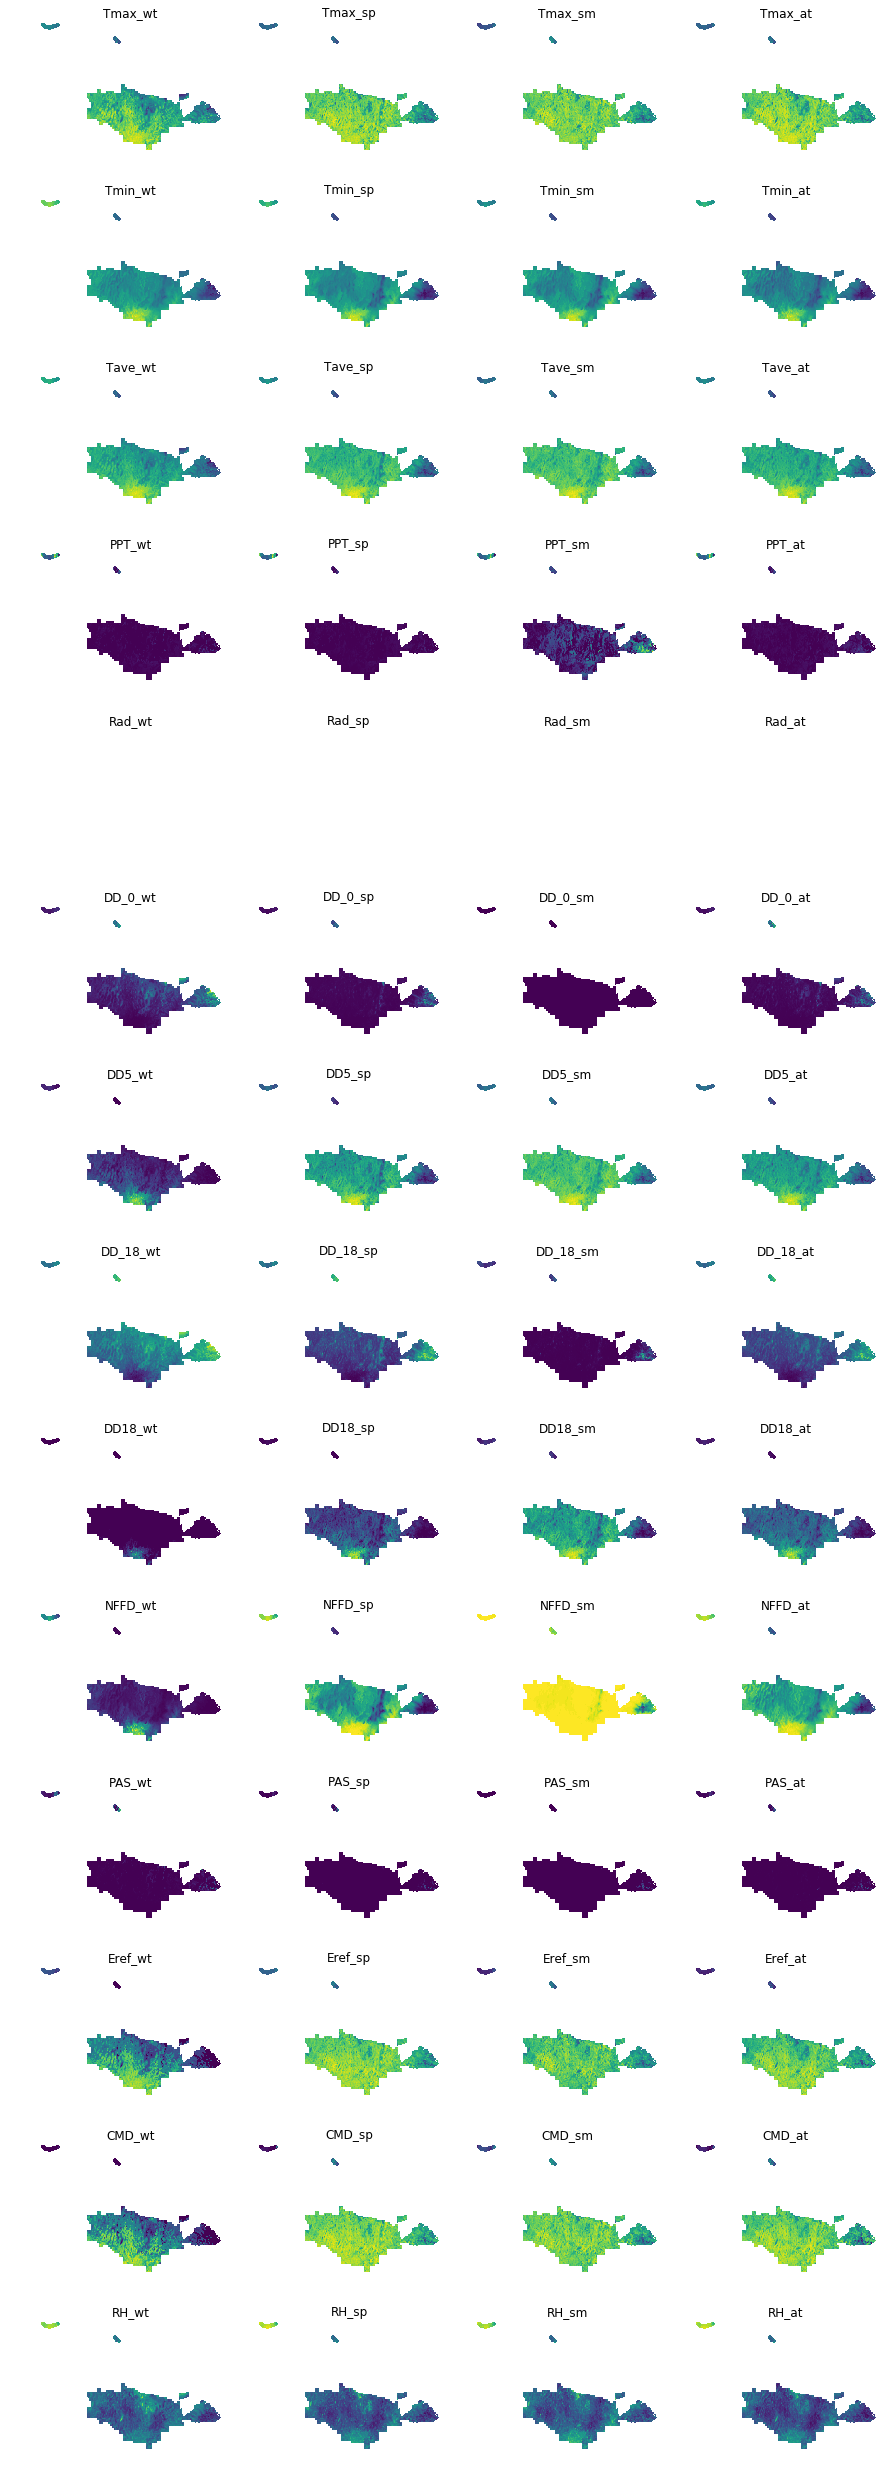

In [33]:
fig, axs = plt.subplots(14,4, figsize=(15,45))
my_year = clim.loc[clim.Year == MY_YEAR][ID_COLS + SEASON_COLS]

arrs = []
for i, metric in enumerate(SEASON_COLS):
    new_arr = template.copy()
    new_arr[my_year.ID1, my_year.ID2] = my_year[metric].values
    new_arr = np.ma.masked_values(new_arr, -9999.0)
    arrs.append(new_arr)

    axs.ravel()[i].imshow(new_arr)
    axs.ravel()[i].set_title(metric)
    axs.ravel()[i].axis('off')

In [15]:
from numpy.lib.stride_tricks import as_strided

def tile_array(a, b0, b1):
    """retiles an array, repeating values b0 times across columns, 
    and b1 times across rows.
    """
    r, c = a.shape                                    # number of rows/columns
    rs, cs = a.strides                                # row/column strides 
    x = as_strided(a, (r, b0, c, b1), (rs, 0, cs, 0)) # view a as larger 4D array
    return x.reshape(r*b0, c*b1)       

In [21]:
# src.index(438997, 5114003)  # lookup which pixel a coordinate falls in

(0, 0)

In [35]:
cols = ANN_COLS
my_year = clim.loc[clim.Year == MY_YEAR][ID_COLS + cols]
arrs = []

for col in cols:
    new_arr = template.copy()
    new_arr[my_year.ID1, my_year.ID2] = my_year[col].values
    new_arr = np.ma.masked_values(new_arr, -9999.0)
    arrs.append(new_arr)

stack = np.ma.stack(arrs, axis=0)

STACK_RASTER = '../data/interim/lidar/processed_lidar_acquisitions/{}_annual_climate_{}.tif'.format(ACQ_NAME, MY_YEAR)
stack_meta = km_meta.copy()
num_layers = len(cols)
stack_meta.update(count=num_layers)

with rasterio.open(STACK_RASTER, 'w', **stack_meta) as dst:
    for i in range(num_layers):
        dst.write_band(i+1, stack[i,:,:])
        dst.set_band_description(i+1, cols[i])

In [37]:
with rasterio.open(STACK_RASTER) as src:
    img = src.read(masked=True)

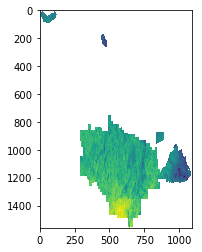

In [39]:
plt.imshow(img[0,:,:])

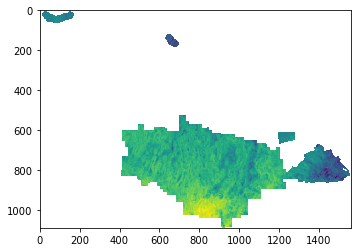

In [45]:
with rasterio.open('../data/interim/lidar/processed_lidar_acquisitions/test_warp.tif') as src:
    img = src.read(masked=True)
plt.imshow(img[0,:,:])

In [38]:
src.shape

(1560, 1090)

In [17]:
cols = SEASON_COLS
my_year = clim.loc[clim.Year == MY_YEAR][ID_COLS + cols]
arrs = []

for col in cols:
    new_arr = template.copy()
    new_arr[my_year.ID1, my_year.ID2] = my_year[col].values
    new_arr = np.ma.masked_values(new_arr, -9999.0)
    arrs.append(new_arr)

stack = np.ma.stack(arrs, axis=0)

STACK_RASTER = '../data/interim/lidar/processed_lidar_acquisitions/{}_seasonal_climate_{}.tif'.format(ACQ_NAME, MY_YEAR)
stack_meta = km_meta.copy()
num_layers = len(cols)
stack_meta.update(count=num_layers)

with rasterio.open(STACK_RASTER, 'w', **stack_meta) as dst:
    for i in range(num_layers):
        dst.write_band(i+1, stack[i,:,:])
        dst.set_band_description(i+1, cols[i])